https://jupyter.utoronto.ca/user/9a3fef23-10c5-4a97-921a-ba1092c22987/notebooks/INF2178_Group19_MidTerm.ipynb

In [ ]:
!pip install tabulate

In [ ]:
!pip install prettytable

In [ ]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
from tabulate import tabulate
from prettytable import PrettyTable
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the original csv
df_ArSt = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
df_ArSt.head(20)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


### Data Cleaning

In [ ]:
# check headers
df_ArSt.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [ ]:
# Check the number of rows and columns
print(df_ArSt.shape)

(65276, 25)


In [ ]:
# Check the data types
print(df_ArSt.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
# Check missing values
print(df_ArSt.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
# Remove Null in Perceived_Race
df_ArSt = df_ArSt.dropna(subset = ['Perceived_Race'])
print(df_ArSt.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             468
PersonID                               0
Perceived_Race                         0
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57472
SearchReason_AssistEscape          57472
SearchReason_PossessWeapons        57472
SearchReason_PossessEvidence       57472
ItemsFound                         57472
ObjectId        

In [ ]:
#Keep the cloumns related to research and remove the others
df_ArSt_sgs = df_ArSt[['Arrest_Year', 'Arrest_Month', 'EventID','Sex', 'Perceived_Race','StripSearch']]
df_ArSt_sgs

,Arrest_Year,Arrest_Month,EventID,Sex,Perceived_Race,StripSearch
0,2020,July-Sept,1005907,M,White,0
1,2020,July-Sept,1014562,M,White,0
2,2020,Oct-Dec,1029922,M,Unknown or Legacy,0
3,2021,Jan-Mar,1052190,M,Black,0
4,2021,Jan-Mar,1015512,M,South Asian,0
...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,F,Indigenous,0
65272,2021,Oct-Dec,1032758,M,South Asian,0
65273,2021,Oct-Dec,1021067,F,White,0
65274,2021,Oct-Dec,1008998,M,Unknown or Legacy,0


In [ ]:
# Count the number of each value in Perceived_Race column
df_ArSt_sgs['Perceived_Race'].value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [ ]:
# Count the number of each value in Sex column
df_ArSt_sgs['Sex'].value_counts()

M    52647
F    12616
U        9
Name: Sex, dtype: int64

In [ ]:
# Count the number of each value in Strip Search column
df_ArSt_sgs['StripSearch'].value_counts()

0    57472
1     7800
Name: StripSearch, dtype: int64

In [ ]:
# Since the number is U is only 9, we won't set them as a category, remove U rows
df_ArSt_sgs = df_ArSt_sgs.loc[df_ArSt_sgs["Sex"] != "U"]

In [ ]:
# Check the number of each value in Sex column 
df_ArSt_sgs['Sex'].value_counts()

M    52647
F    12616
Name: Sex, dtype: int64

In [ ]:
#Remove the unknown race groups since the number is small which won't impact the analysis result
df_ArSt_sgs = df_ArSt_sgs.loc[df_ArSt_sgs["Perceived_Race"] != "Unknown or Legacy"]

In [ ]:
#Merge the Asian groups
df_ArSt_sgs['Perceived_Race'] = df_ArSt_sgs['Perceived_Race'].replace({'South Asian': 'Asian'})
df_ArSt_sgs['Perceived_Race'] = df_ArSt_sgs['Perceived_Race'].replace({'East/Southeast Asian': 'Asian'})

In [ ]:
# Check the number of each value in Perceived_Race column 
df_ArSt_sgs['Perceived_Race'].value_counts()

White             27718
Black             17526
Asian              8028
Middle-Eastern     3237
Indigenous         1934
Latino             1767
Name: Perceived_Race, dtype: int64

In [ ]:
# Filter intance strip search took place
ss = df_ArSt_sgs.loc[df_ArSt_sgs['StripSearch'] == 1] 
ss.head(20)

,Arrest_Year,Arrest_Month,EventID,Sex,Perceived_Race,StripSearch
12,2021,Apr-June,1039002,M,Black,1
14,2020,Apr-June,1045382,M,Black,1
33,2021,Jan-Mar,1026070,M,White,1
38,2020,Apr-June,1028958,M,Latino,1
42,2020,July-Sept,1026364,F,Asian,1
44,2020,Oct-Dec,1026190,F,Asian,1
52,2020,Apr-June,1044055,M,White,1
56,2021,July-Sept,1047514,F,White,1
58,2021,Jan-Mar,1003364,F,White,1
69,2020,Jan-Mar,1036208,M,Asian,1


In [ ]:
#Sum strip search instances
ss = ss.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex'])['StripSearch'].sum().reset_index()
ss.head(20)

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,StripSearch
0,2020,Apr-June,Asian,F,12
1,2020,Apr-June,Asian,M,132
2,2020,Apr-June,Black,F,46
3,2020,Apr-June,Black,M,480
4,2020,Apr-June,Indigenous,F,13
5,2020,Apr-June,Indigenous,M,59
6,2020,Apr-June,Latino,F,3
7,2020,Apr-June,Latino,M,29
8,2020,Apr-June,Middle-Eastern,F,5
9,2020,Apr-June,Middle-Eastern,M,45


In [ ]:
# Filter intance strip search NOT took place
df_ssn = df_ArSt_sgs.loc[df_ArSt_sgs['StripSearch'] == 0] 
df_ssn

,Arrest_Year,Arrest_Month,EventID,Sex,Perceived_Race,StripSearch
0,2020,July-Sept,1005907,M,White,0
1,2020,July-Sept,1014562,M,White,0
3,2021,Jan-Mar,1052190,M,Black,0
4,2021,Jan-Mar,1015512,M,Asian,0
5,2021,Apr-June,1019145,M,Asian,0
...,...,...,...,...,...,...
65270,2021,Oct-Dec,1046034,F,White,0
65271,2021,Oct-Dec,1055609,F,Indigenous,0
65272,2021,Oct-Dec,1032758,M,Asian,0
65273,2021,Oct-Dec,1021067,F,White,0


In [ ]:
#Sum no strip search instances
ssn = df_ssn.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex'])['StripSearch'].count().reset_index()
ssn.head(20)

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,StripSearch
0,2020,Apr-June,Asian,F,92
1,2020,Apr-June,Asian,M,570
2,2020,Apr-June,Black,F,261
3,2020,Apr-June,Black,M,1054
4,2020,Apr-June,Indigenous,F,44
5,2020,Apr-June,Indigenous,M,87
6,2020,Apr-June,Latino,F,18
7,2020,Apr-June,Latino,M,122
8,2020,Apr-June,Middle-Eastern,F,39
9,2020,Apr-June,Middle-Eastern,M,251


In [ ]:
# merge counts with sgs DataFrame
sgs = pd.merge(ss, ssn, on=['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex'])
sgs.head(20)

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,StripSearch_x,StripSearch_y
0,2020,Apr-June,Asian,F,12,92
1,2020,Apr-June,Asian,M,132,570
2,2020,Apr-June,Black,F,46,261
3,2020,Apr-June,Black,M,480,1054
4,2020,Apr-June,Indigenous,F,13,44
5,2020,Apr-June,Indigenous,M,59,87
6,2020,Apr-June,Latino,F,3,18
7,2020,Apr-June,Latino,M,29,122
8,2020,Apr-June,Middle-Eastern,F,5,39
9,2020,Apr-June,Middle-Eastern,M,45,251


In [ ]:
sgs['portion'] = round(sgs['StripSearch_x']/sgs['StripSearch_y'],2)
sgs.head(20)

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,StripSearch_x,StripSearch_y,portion
0,2020,Apr-June,Asian,F,12,92,0.13
1,2020,Apr-June,Asian,M,132,570,0.23
2,2020,Apr-June,Black,F,46,261,0.18
3,2020,Apr-June,Black,M,480,1054,0.46
4,2020,Apr-June,Indigenous,F,13,44,0.30
5,2020,Apr-June,Indigenous,M,59,87,0.68
6,2020,Apr-June,Latino,F,3,18,0.17
7,2020,Apr-June,Latino,M,29,122,0.24
8,2020,Apr-June,Middle-Eastern,F,5,39,0.13
9,2020,Apr-June,Middle-Eastern,M,45,251,0.18


### EDA

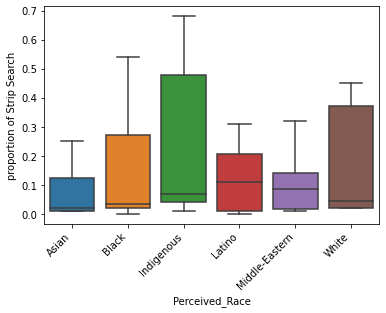

In [ ]:
#Visualise overall pattern between Race groups and strip search 
sns.boxplot(x='Perceived_Race', y='portion', data=sgs)
race = sgs['Perceived_Race'].unique().tolist()
plt.ylabel('proportion of Strip Search')
plt.xticks(rotation=45)
plt.xticks(range(len(race)), race, ha='right', va='top')
plt.show()

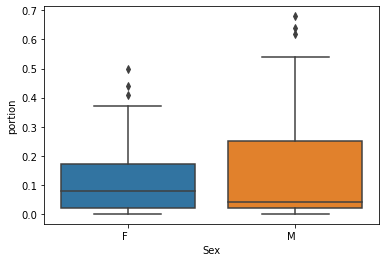

In [ ]:
#Visualise overall pattern between Gender groups and StripSearch 
sns.boxplot(x='Sex', y='portion', data=sgs)
Sex = sgs['Sex'].unique().tolist()
plt.xticks(rotation=0)
plt.xticks(range(len(Sex)), Sex, ha='right', va='top')
plt.show()

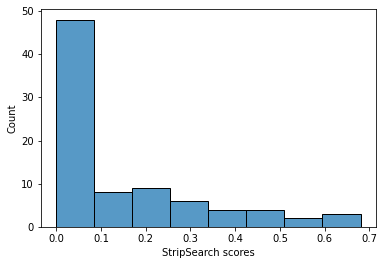

In [ ]:
# Check the distribution of variables
sns.histplot(sgs['portion'], kde=False)
plt.ylabel('Count')
plt.xlabel('StripSearch scores')
plt.show()

In [ ]:
#Calculate summary statistics
sustr = sgs.groupby('Perceived_Race')['portion'].describe()
print(sustr)

                count      mean       std   min     25%    50%     75%   max
Perceived_Race                                                              
Asian            15.0  0.080000  0.093427  0.01  0.0100  0.020  0.1250  0.25
Black            16.0  0.156250  0.194487  0.00  0.0200  0.035  0.2725  0.54
Indigenous       14.0  0.247857  0.266175  0.01  0.0400  0.070  0.4775  0.68
Latino           11.0  0.116364  0.112718  0.00  0.0100  0.110  0.2050  0.31
Middle-Eastern   12.0  0.100000  0.097887  0.01  0.0175  0.085  0.1425  0.32
White            16.0  0.170000  0.185257  0.02  0.0200  0.045  0.3725  0.45


In [ ]:
#Calculate summary statistics
susts = sgs.groupby('Sex')['portion'].describe()
print(susts)

     count      mean       std  min   25%   50%   75%   max
Sex                                                        
F     37.0  0.127568  0.139272  0.0  0.02  0.08  0.17  0.50
M     47.0  0.162766  0.202717  0.0  0.02  0.04  0.25  0.68


### Rearch Question1: Whether proportion of strip search differs between different race and sex groups?

In [ ]:
# Separate the strip search scores by selected race group
black = sgs.loc[sgs['Perceived_Race'] == 'Black', 'portion']
latino = sgs.loc[sgs['Perceived_Race'] == 'Latino', 'portion']
indigenous = sgs.loc[sgs['Perceived_Race'] == 'Indigenous', 'portion']
white = sgs.loc[sgs['Perceived_Race'] == 'White', 'portion']
asian = sgs.loc[sgs['Perceived_Race'] == 'Asian', 'portion']
middle_eastern = sgs.loc[sgs['Perceived_Race'] == 'Middle-Eastern', 'portion']

# Perform t-test for each pair of race groups
t_stat, p_val = ttest_ind(latino, indigenous, equal_var=False)
print("Welch's t-test for Latino vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, indigenous, equal_var=False)
print("Welch's t-test for Black vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, indigenous, equal_var=False)
print("Welch's t-test for White vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(asian, indigenous, equal_var=False)
print("Welch's t-test for Asian vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, indigenous, equal_var=False)
print("Welch's t-test for Middle-Eastern vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, latino, equal_var=False)
print("Welch's t-test for White vs Latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, latino, equal_var=False)
print("Welch's t-test for Black vs Latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(asian, latino, equal_var=False)
print("Welch's t-test for Asian vs Latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, latino, equal_var=False)
print("Welch's t-test for Middle-Eastern vs Latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, asian, equal_var=False)
print("Welch's t-test for White vs Asian:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, asian, equal_var=False)
print("Welch's t-test for Black vs Asian:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, asian, equal_var=False)
print("Welch's t-test for Middle-Eastern vs Asian:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, white, equal_var=False)
print("Welch's t-test for Black vs White:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, white, equal_var=False)
print("Welch's t-test for Middle-Eastern vs White:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, middle_eastern, equal_var=False)
print("Welch's t-test for Black vs Middle-Eastern:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

Welch's t-test for Latino vs Indigenous:
t-statistic: -1.668
p-value: 0.112
Welch's t-test for Black vs Indigenous:
t-statistic: -1.063
p-value: 0.299
Welch's t-test for White vs Indigenous:
t-statistic: -0.917
p-value: 0.369
Welch's t-test for Asian vs Indigenous:
t-statistic: -2.235
p-value: 0.040
Welch's t-test for Middle-Eastern vs Indigenous:
t-statistic: -1.932
p-value: 0.070
Welch's t-test for White vs Latino:
t-statistic: 0.934
p-value: 0.359
Welch's t-test for Black vs Latino:
t-statistic: 0.672
p-value: 0.508
Welch's t-test for Asian vs Latino:
t-statistic: -0.873
p-value: 0.394
Welch's t-test for Middle-Eastern vs Latino:
t-statistic: -0.370
p-value: 0.715
Welch's t-test for White vs Asian:
t-statistic: 1.723
p-value: 0.099
Welch's t-test for Black vs Asian:
t-statistic: 1.405
p-value: 0.174
Welch's t-test for Middle-Eastern vs Asian:
t-statistic: 0.538
p-value: 0.595
Welch's t-test for Black vs White:
t-statistic: -0.205
p-value: 0.839
Welch's t-test for Middle-Eastern vs W

In [ ]:
# Separate the strip search scores by selected gender group
male = sgs.loc[sgs['Sex'] == 'M', 'portion']
female = sgs.loc[sgs['Sex'] == 'F', 'portion']

# Perform t-test for each pair of gender groups
t_stat, p_val = ttest_ind(male, female, equal_var=False)
print("Welch's t-test for Male vs Female:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

Welch's t-test for Male vs Female:
t-statistic: 0.941
p-value: 0.349


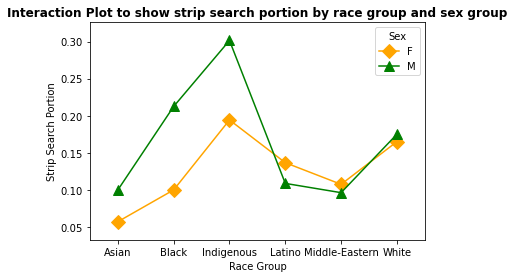

In [ ]:
sex = sgs['Sex'].astype("category")
portion = sgs['portion'].values

sgs_interaction = interaction_plot(sgs['Perceived_Race'], sex, portion, colors=['orange','green'], markers=['D','^'], ms=10)
#x axis(m_edu), trace (romantic status of the student), dependent variable (mean grade)

plt.ylabel('Strip Search Portion')
plt.xlabel('Race Group')
plt.title('Interaction Plot to show strip search portion by race group and sex group', fontweight='bold')

plt.show()

### Perform two-way ANOVA

In [ ]:
model = ols('portion ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=sgs).fit()
TWA = sm.stats.anova_lm(model, typ=2)
print(TWA)

                            sum_sq    df         F    PR(>F)
C(Perceived_Race)         0.274205   5.0  1.748874  0.134475
C(Sex)                    0.043449   1.0  1.385571  0.243031
C(Perceived_Race):C(Sex)  0.056650   5.0  0.361313  0.873307
Residual                  2.257767  72.0       NaN       NaN


### Tukey's HSD test

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(sgs['portion'], sgs['Perceived_Race'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Asian,Black,0.0762,0.8033,-0.1063,0.2588,False
Asian,Indigenous,0.1679,0.1101,-0.0209,0.3566,False
Asian,Latino,0.0364,0.9,-0.1653,0.238,False
Asian,Middle-Eastern,0.02,0.9,-0.1767,0.2167,False
Asian,White,0.09,0.6784,-0.0926,0.2726,False
Black,Indigenous,0.0916,0.6788,-0.0943,0.2775,False
Black,Latino,-0.0399,0.9,-0.2388,0.1591,False
Black,Middle-Eastern,-0.0562,0.9,-0.2502,0.1377,False
Black,White,0.0137,0.9,-0.1658,0.1933,False
Indigenous,Latino,-0.1315,0.4258,-0.3362,0.0732,False


In [ ]:
mcs = MultiComparison(sgs['portion'], sgs['Sex'])
mcsresult = mcs.tukeyhsd(0.05)
mcsresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
F,M,0.0352,0.37,-0.0425,0.1129,False


### Research Question2: Is there a statistically significant difference in cooperativeness between different race groups? Which race group exhibit the highest level of cooperativeness?

In [ ]:
#read dataset into dataframe
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [ ]:
# Check the first few rows of the dataset
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
#Presume booking took place given strip search took place
df.loc[df['StripSearch'] == 1, 'Booked'] = 1

In [ ]:
df['Age_group__at_arrest_'].value_counts()

Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 18 to 24 years          10041
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64

In [ ]:
# combining two columns that both represent 65 and older
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 65 and older': 'Aged 65 years and older'})
# combining two columns that both represent under 17
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 17 years and under': 'Aged 17 years and younger'})

In [ ]:
# merge columns and sum cooperative instances
coop = df.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])['Actions_at_arrest___Cooperative'].sum().reset_index()

# count number of instances for each merged row
Arrests = df.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])['Actions_at_arrest___Cooperative'].count().reset_index()
Arrests.rename(columns={'Actions_at_arrest___Cooperative': 'Arrests'}, inplace=True)

# merge counts with coop DataFrame
coop = pd.merge(coop, Arrests, on=['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])

coop.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,Arrests
0,2020,Apr-June,Black,F,Aged 17 years and younger,16,36
1,2020,Apr-June,Black,F,Aged 18 to 24 years,30,87
2,2020,Apr-June,Black,F,Aged 25 to 34 years,23,99
3,2020,Apr-June,Black,F,Aged 35 to 44 years,22,52
4,2020,Apr-June,Black,F,Aged 45 to 54 years,6,26


In [ ]:
coop['Perceived_Race'].value_counts()

White                   116
Unknown or Legacy       113
East/Southeast Asian    112
Black                   110
Middle-Eastern          107
South Asian             106
Latino                  101
Indigenous               98
Name: Perceived_Race, dtype: int64

In [ ]:
#Remove unknowns from out dataset 
coop = coop.drop(coop[coop['Perceived_Race'] == 'Unknown or Legacy'].index)

In [ ]:
'''
We calculate the cooperative scores for each race group by dividing the number of cooperative instances by
the total number of arrests for each group, and named the new column 'portion'
'''

coop['portion'] = round(coop['Actions_at_arrest___Cooperative']/coop['Arrests'],2)
coop.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,Arrests,portion
0,2020,Apr-June,Black,F,Aged 17 years and younger,16,36,0.44
1,2020,Apr-June,Black,F,Aged 18 to 24 years,30,87,0.34
2,2020,Apr-June,Black,F,Aged 25 to 34 years,23,99,0.23
3,2020,Apr-June,Black,F,Aged 35 to 44 years,22,52,0.42
4,2020,Apr-June,Black,F,Aged 45 to 54 years,6,26,0.23


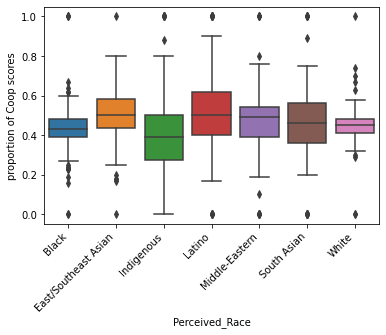

In [ ]:
#Visualise overall pattern between Race groups and cooperativeness 
sns.boxplot(x='Perceived_Race', y='portion', data=coop)
race = coop['Perceived_Race'].unique().tolist()
plt.ylabel('proportion of Coop scores')
plt.xticks(rotation=45)
plt.xticks(range(len(race)), race, ha='right', va='top')
plt.show()

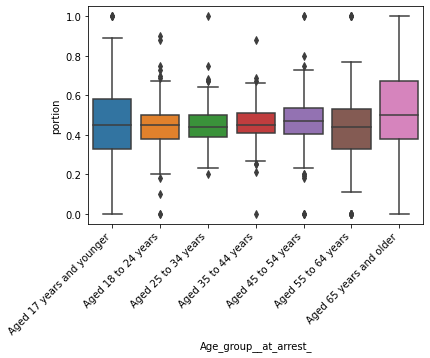

In [ ]:
#Visualise overall pattern between Age groups and cooperativeness 
sns.boxplot(x='Age_group__at_arrest_', y='portion', data=coop)
age = coop['Age_group__at_arrest_'].unique().tolist()
plt.xticks(rotation=45)
plt.xticks(range(len(age)), age, ha='right', va='top')
plt.show()

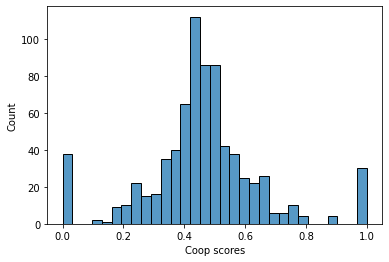

In [ ]:
# Check the distribution of variables
sns.histplot(coop['portion'], kde=False)
plt.ylabel('Count')
plt.xlabel('Coop scores')
plt.show()

In [ ]:
#Calculate summary statistics
summary = coop.groupby('Perceived_Race')['portion'].describe()
print(summary)

                      count      mean       std  min     25%   50%     75%  \
Perceived_Race                                                               
Black                 110.0  0.433818  0.141376  0.0  0.3900  0.43  0.4800   
East/Southeast Asian  112.0  0.504196  0.142662  0.0  0.4375  0.50  0.5825   
Indigenous             98.0  0.411939  0.248163  0.0  0.2750  0.39  0.5000   
Latino                101.0  0.505545  0.242052  0.0  0.4000  0.50  0.6200   
Middle-Eastern        107.0  0.464766  0.195855  0.0  0.3900  0.49  0.5400   
South Asian           106.0  0.457453  0.218122  0.0  0.3600  0.46  0.5600   
White                 116.0  0.448621  0.105393  0.0  0.4100  0.45  0.4800   

                      max  
Perceived_Race             
Black                 1.0  
East/Southeast Asian  1.0  
Indigenous            1.0  
Latino                1.0  
Middle-Eastern        1.0  
South Asian           1.0  
White                 1.0  


In [ ]:
#Making a table for the result
table = PrettyTable()

# Define the column names
table.field_names = ["Perceived_Race", "count", "mean", "std", "min", "25%", "50%", "75%"]

# Add the data rows to the table
table.add_row(["Black", 110, 0.433818, 0.141376, 0.0, 0.3900, 0.43, 0.4800])
table.add_row(["East/Southeast Asian", 112, 0.504196, 0.142662, 0.0, 0.4375, 0.50, 0.5825])
table.add_row(["Indigenous", 98, 0.411939, 0.248163, 0.0, 0.2750, 0.39, 0.5000])
table.add_row(["Latino", 101, 0.505545, 0.242052, 0.0, 0.4000, 0.50, 0.6200])
table.add_row(["Middle-Eastern", 107, 0.464766, 0.195855, 0.0, 0.3900, 0.49, 0.5400])
table.add_row(["South Asian", 106, 0.457453, 0.218122, 0.0, 0.3600, 0.46, 0.5600])
table.add_row(["White", 116, 0.448621, 0.105393, 0.0, 0.4100, 0.45, 0.4800])

# Set the alignment of numeric columns
for field in table.field_names[1:]:
    table.align[field] = "right"

# Print the table
print(table)


+----------------------+-------+----------+----------+-----+--------+------+--------+
|    Perceived_Race    | count |   mean   |   std    | min |  25%   | 50%  |  75%   |
+----------------------+-------+----------+----------+-----+--------+------+--------+
|        Black         |  110  | 0.433818 | 0.141376 | 0.0 |  0.39  | 0.43 |  0.48  |
| East/Southeast Asian |  112  | 0.504196 | 0.142662 | 0.0 | 0.4375 | 0.5  | 0.5825 |
|      Indigenous      |   98  | 0.411939 | 0.248163 | 0.0 | 0.275  | 0.39 |  0.5   |
|        Latino        |  101  | 0.505545 | 0.242052 | 0.0 |  0.4   | 0.5  |  0.62  |
|    Middle-Eastern    |  107  | 0.464766 | 0.195855 | 0.0 |  0.39  | 0.49 |  0.54  |
|     South Asian      |  106  | 0.457453 | 0.218122 | 0.0 |  0.36  | 0.46 |  0.56  |
|        White         |  116  | 0.448621 | 0.105393 | 0.0 |  0.41  | 0.45 |  0.48  |
+----------------------+-------+----------+----------+-----+--------+------+--------+


In [ ]:
# separate the cooperative scores by selected race group
black = coop.loc[coop['Perceived_Race'] == 'Black', 'portion']
latino = coop.loc[coop['Perceived_Race'] == 'Latino', 'portion']
indigenous = coop.loc[coop['Perceived_Race'] == 'Indigenous', 'portion']
white = coop.loc[coop['Perceived_Race'] == 'White', 'portion']

# perform t-test for each pair of race groups
t_stat, p_val = ttest_ind(latino, indigenous, equal_var=False)
print("Welch's t-test for Latino vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, indigenous, equal_var=False)
print("Welch's t-test for Black vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, indigenous, equal_var=False)
print("Welch's t-test for White vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, latino, equal_var=False)
print("Welch's t-test for White vs latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, latino, equal_var=False)
print("Welch's t-test for black vs latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

Welch's t-test for Latino vs Indigenous:
t-statistic: 2.693
p-value: 0.008
Welch's t-test for Black vs Indigenous:
t-statistic: 0.769
p-value: 0.443
Welch's t-test for White vs Indigenous:
t-statistic: 1.363
p-value: 0.175
Welch's t-test for White vs latino:
t-statistic: -2.190
p-value: 0.030
Welch's t-test for black vs latino:
t-statistic: -2.599
p-value: 0.010


In [ ]:
#Perform one-way ANOVA
model = ols('portion ~ Perceived_Race', data=coop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq     df         F    PR(>F)
Perceived_Race   0.747156    6.0  3.477071  0.002137
Residual        26.609411  743.0       NaN       NaN


In [ ]:
#Making a table for the result
#define the data in a list of lists
data = [
    ['Perceived_Race', 0.747156, 6.0, 3.477071, 0.002137],
    ['Residual', 26.609411, 743.0, '', '']
]

# define the headers for the table
headers = ['Source', 'Sum of Squares', 'Degrees of Freedom', 'F-statistic', 'p-value']

# use tabulate to create the table and print it
print(tabulate(data, headers=headers, tablefmt='fancy_grid'))

╒════════════════╤══════════════════╤══════════════════════╤═══════════════╤═══════════╕
│ Source         │   Sum of Squares │   Degrees of Freedom │ F-statistic   │ p-value   │
╞════════════════╪══════════════════╪══════════════════════╪═══════════════╪═══════════╡
│ Perceived_Race │         0.747156 │                    6 │ 3.477071      │ 0.002137  │
├────────────────┼──────────────────┼──────────────────────┼───────────────┼───────────┤
│ Residual       │        26.6094   │                  743 │               │           │
╘════════════════╧══════════════════╧══════════════════════╧═══════════════╧═══════════╛


In [ ]:
# Conduct Tukey's HSD test
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(coop['portion'], coop['Perceived_Race'])
# Print the results
print(tukey_results.summary())

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian   0.0704 0.0834 -0.0047  0.1455  False
               Black           Indigenous  -0.0219    0.9 -0.0996  0.0558  False
               Black               Latino   0.0717 0.0875 -0.0054  0.1488  False
               Black       Middle-Eastern   0.0309 0.8908  -0.045  0.1069  False
               Black          South Asian   0.0236    0.9 -0.0525  0.0998  False
               Black                White   0.0148    0.9 -0.0597  0.0893  False
East/Southeast Asian           Indigenous  -0.0923 0.0082 -0.1696 -0.0149   True
East/Southeast Asian               Latino   0.0013    0.9 -0.0754  0.0781  False
East/Southeast Asian       Middle-Eastern  -0.0394 0.6932 -0.1151  0.0362  False
East/Southeast Asian        